The following hypotheses are formulated to guide the analysis process:
- Shark attacks occur more frequently in certain geographical locations.
- Sharks attack more people who engage in aquatic activities such as surfing or diving.
- Shark attacks are more common in men than in women.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functions import leer_datos,clean_data,choosen_columns,null_and_duplicates,value_and_type_change,top_5_activities,top_5_country,top_sex,show_top

url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
df = leer_datos(url)

A clean-up of non-valuable data is performed and the DataFrame to be worked with is displayed.

In [2]:
df = clean_data(df)
df_mvp = choosen_columns(df) 
df_mvp = null_and_duplicates(df_mvp)
df_mvp = value_and_type_change(df_mvp)

In [3]:
df_mvp

,date,year,country,state,activity,sex,fatal
0,15 Mar 2024,2024,AUSTRALIA,Queensland,Swimming,F,0
1,04 Mar 2024,2024,USA,Hawaii,Surfing,M,0
2,02 Mar-2024,2024,USA,Hawaii,Swimming,F,0
3,25 Feb-2024,2024,AUSTRALIA,Western Australia,Unknown,F,0
4,14 Feb-2024,2024,INDIA,Maharashtra,Fishing,M,0
...,...,...,...,...,...,...,...
3903,09-Jan-1974,1974,AUSTRALIA,South Australia,Diving for abalone,M,1
3904,07-Jan-1974,1974,SOUTH AFRICA,KwaZulu-Natal,Swimming,M,0
3905,07-Jan-1974,1974,MOZAMBIQUE,Gaza,Swimming,M,1
3907,Summer 1974,1974,AUSTRALIA,Western Australia,Spearfishing,M,0


The values needed to test the hypotheses are grouped together and shown in a graph for each one.

In [4]:
top_5 = top_5_country(df_mvp)
top_5_activity = top_5_activities(df_mvp)
top_sexs = top_sex(df_mvp)

Shark attacks over the last 50 years by country.

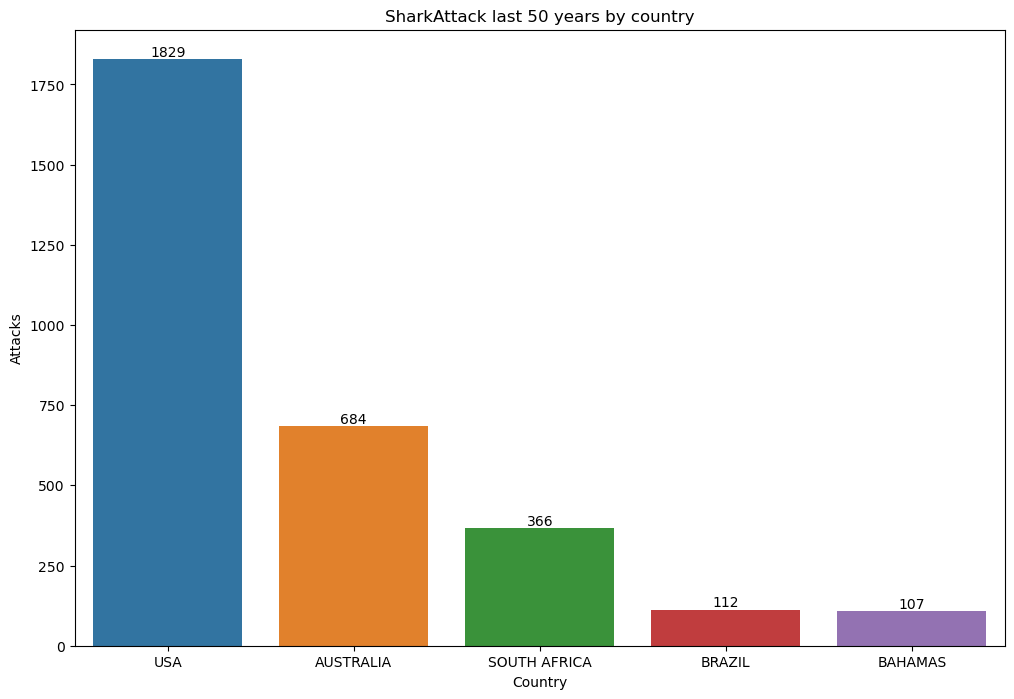

In [5]:
show_top(data = top_5, x_col = "country", y_col = "count", title = "SharkAttack last 50 years by country", x_label = "Country", y_label = "Attacks")

Shark attacks over the last 50 years by activity.

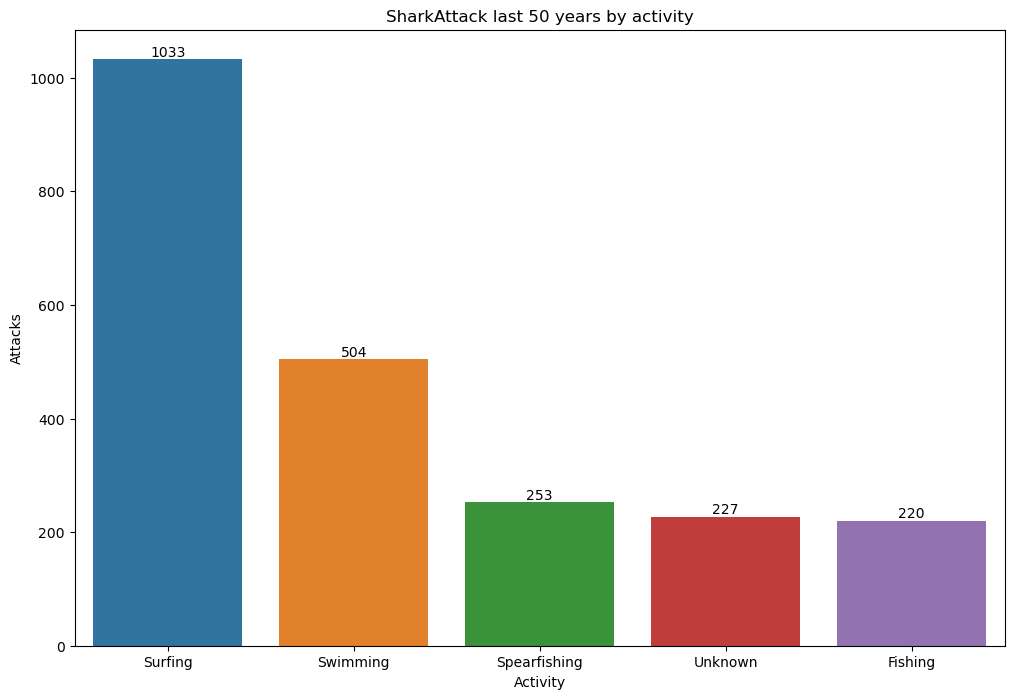

In [6]:
show_top(data = top_5_activity, x_col = "activity", y_col = "count", title = "SharkAttack last 50 years by activity", x_label = "Activity", y_label = "Attacks")

Shark attacks over the last 50 years by sex.

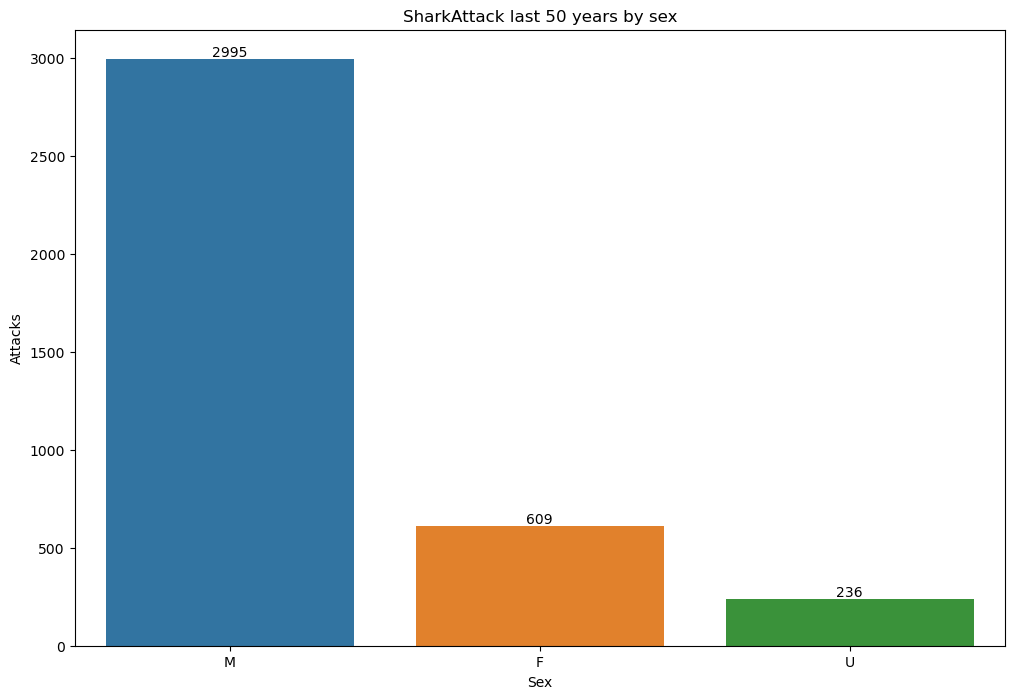

In [7]:
show_top(data = top_sexs, x_col = "sex", y_col = "count", title = "SharkAttack last 50 years by sex", x_label = "Sex", y_label = "Attacks")